<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_69/blob/main/Reto_Parte_1_Equipo_69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maestría en Inteligencia Artificial Aplicada
#Curso: Ciencia de los Datos
Tecnológico de Monterrey

Prof Dra. Maria de la Paz Rico Fernández

# Reto - Avance 1  -   **EQUIPO 69**
**AGUAS SUBTERRÁNEAS - MEXICO**

**Estudiantes:**
*   A01794050 - Moreno Villarreal José Bernardo 
*   A01793814 - Emerson Jonathan Rincón Morales 




In [ ]:
#Instalación de librería de Geopandas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [ ]:
#importación de librerías 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import power_transform 
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans


In [ ]:
#Lectura del archivo de Aguas subterráneas.
df=pd.read_csv('/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df.head(2)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [ ]:
#copia del dataFrame para su análisis. 
df_Aguas_Subterraneas = df.copy() 

In [ ]:
#Se verifica el tamaño del DataFrame
df_Aguas_Subterraneas.shape

(1068, 57)

Comentario: 
Se observa que el dataFrame está organizado en 57 columnas y tiene 1068 registros. 

Comentario: 
Solo existen 6 columnas con datos variables, el resto son datos de tipo categórico o se encuentran con texto. 

#Limpieza de Datos

In [ ]:
#Visualización del tipo de datos utilizados 
df_Aguas_Subterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
#Verificación de datos faltantes
df_Aguas_Subterraneas.isnull().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [ ]:
#Verificación del nombre de las columnas
df_Aguas_Subterraneas.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [ ]:
#Separación de columnas
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

In [ ]:
columnas_numericas_obj = ['SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

In [ ]:
Columnas_categoricas=['SUBTIPO','CALIDAD_ALC','CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'CALIDAD_DUR', 
       'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 
       'CALIDAD_MN',  'CALIDAD_FE', 'SEMAFORO', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE']

In [ ]:
#Determinación de variable de salida
y=df["SEMAFORO"]

In [ ]:
#DataFrame para trabajar 
df_num= df_Aguas_Subterraneas[columnas_numericas]
df_num

,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,NaN,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,NaN,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,NaN,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,NaN,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,NaN,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,NaN,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [ ]:
#Se empiezan a trabajar con el DataFrame de df_numericas
df_num.isna().sum()

ALC_mg/L                  4
CONDUCT_mS/cm             6
SDT_mg/L               1068
SDT_M_mg/L                2
FLUORUROS_mg/L            0
DUR_mg/L                  1
COLI_FEC_NMP/100_mL       0
N_NO3_mg/L                1
AS_TOT_mg/L               0
CD_TOT_mg/L               0
CR_TOT_mg/L               0
HG_TOT_mg/L               0
PB_TOT_mg/L               0
MN_TOT_mg/L               0
FE_TOT_mg/L               0
dtype: int64

In [ ]:
#La columna de SDT_mg/L no tiene registros, por lo tanto la eliminamos ya que no se puede hacer una imputación precisa.
df_num.drop(columns=["SDT_mg/L"], inplace = True)
df_num.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ALC_mg/L               4
CONDUCT_mS/cm          6
SDT_M_mg/L             2
FLUORUROS_mg/L         0
DUR_mg/L               1
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             1
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

In [ ]:
#Imputación de los datos 
Imputation_List_Num = columnas_numericas_obj
#Se crea un diccionario para transformar los valores string a float
str_values = {"<25":"25","<0.2":"0.2","<20":"20","<1.1":"1.1","<0.02":"0.02",'<0.01':"0.01",'<0.003':"0.003",'<0.005':"0.005",'<0.0005':"0.0005",'<0.0015':"0.0015",'<0.025':"0.025"}
for nombres in Imputation_List_Num:
  for values in str_values: 
     df_num[nombres].astype(str)
     df_num[nombres]=df_num[nombres].str.replace(values,str_values[values]) 
  df_num[nombres]=df_num[nombres].astype(str).astype(float)
df_num.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [ ]:
#Imputación de variables
for nombres in Imputation_List_Num:
  tempVar = df_num[nombres].mean()
  df_num[nombres].fillna(value= tempVar, inplace = True)
df_num.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


ALC_mg/L               4
CONDUCT_mS/cm          6
SDT_M_mg/L             0
FLUORUROS_mg/L         0
DUR_mg/L               0
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

In [ ]:
#Se imputan las variables que previamente eran tipo float 
for nombres in ["CONDUCT_mS/cm","ALC_mg/L"]:
 tempVar=df_num[nombres].mean()
 df_num[nombres].fillna(value=tempVar,inplace = True)


In [ ]:
#Verificación que el set se encuentre limpio
df_num.isna().sum()

ALC_mg/L               0
CONDUCT_mS/cm          0
SDT_M_mg/L             0
FLUORUROS_mg/L         0
DUR_mg/L               0
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

#Explorar Datos

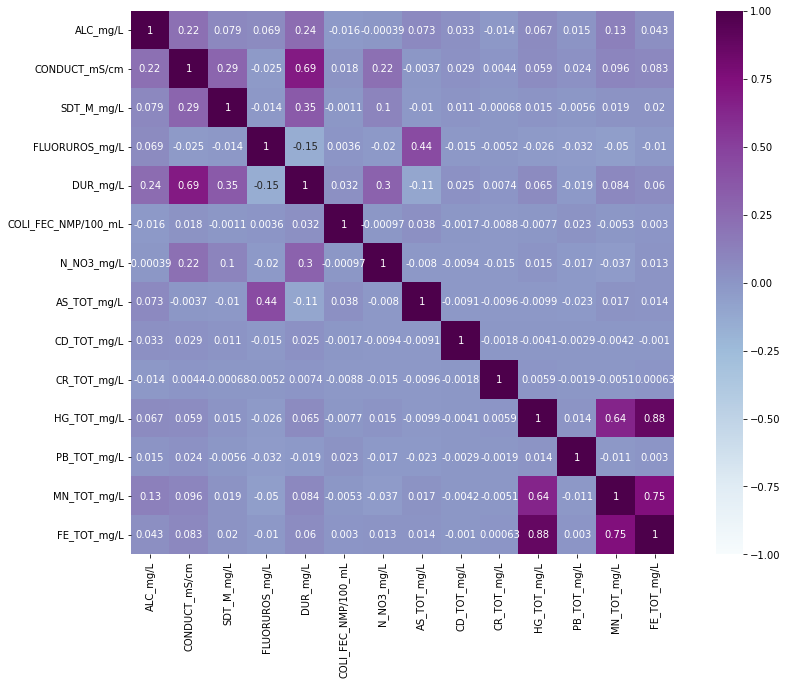

In [ ]:
plt.subplots(figsize = (15,10))
sns.heatmap(df_num.corr(), vmax = 1, vmin = -1, square = True, annot = True, cmap = "BuPu")

In [ ]:
#Descripción de los datos 
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.633759,116.655014,26.6400,164.048750,215.825000,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1138.953013,1242.056683,50.4000,505.500000,822.500000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,896.101567,2748.950627,25.0000,337.700000,551.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.938073,359.500870,20.0000,121.274100,245.662350,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.319759,8.341222,0.0200,0.650932,2.082916,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.013276,0.154391,0.0050,0.005000,0.005000,0.005000,5.003200


In [ ]:
df_str = df_num.astype(int)

In [ ]:
columns_plot= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
 'FLUORUROS_mg/L',
 'DUR_mg/L',
 'COLI_FEC_NMP/100_mL',
 'N_NO3_mg/L',
 'AS_TOT_mg/L',
 'CD_TOT_mg/L',
 'CR_TOT_mg/L',
 'HG_TOT_mg/L',
 'PB_TOT_mg/L',
 'MN_TOT_mg/L',
 'FE_TOT_mg/L',
 'ALC_mg/L']

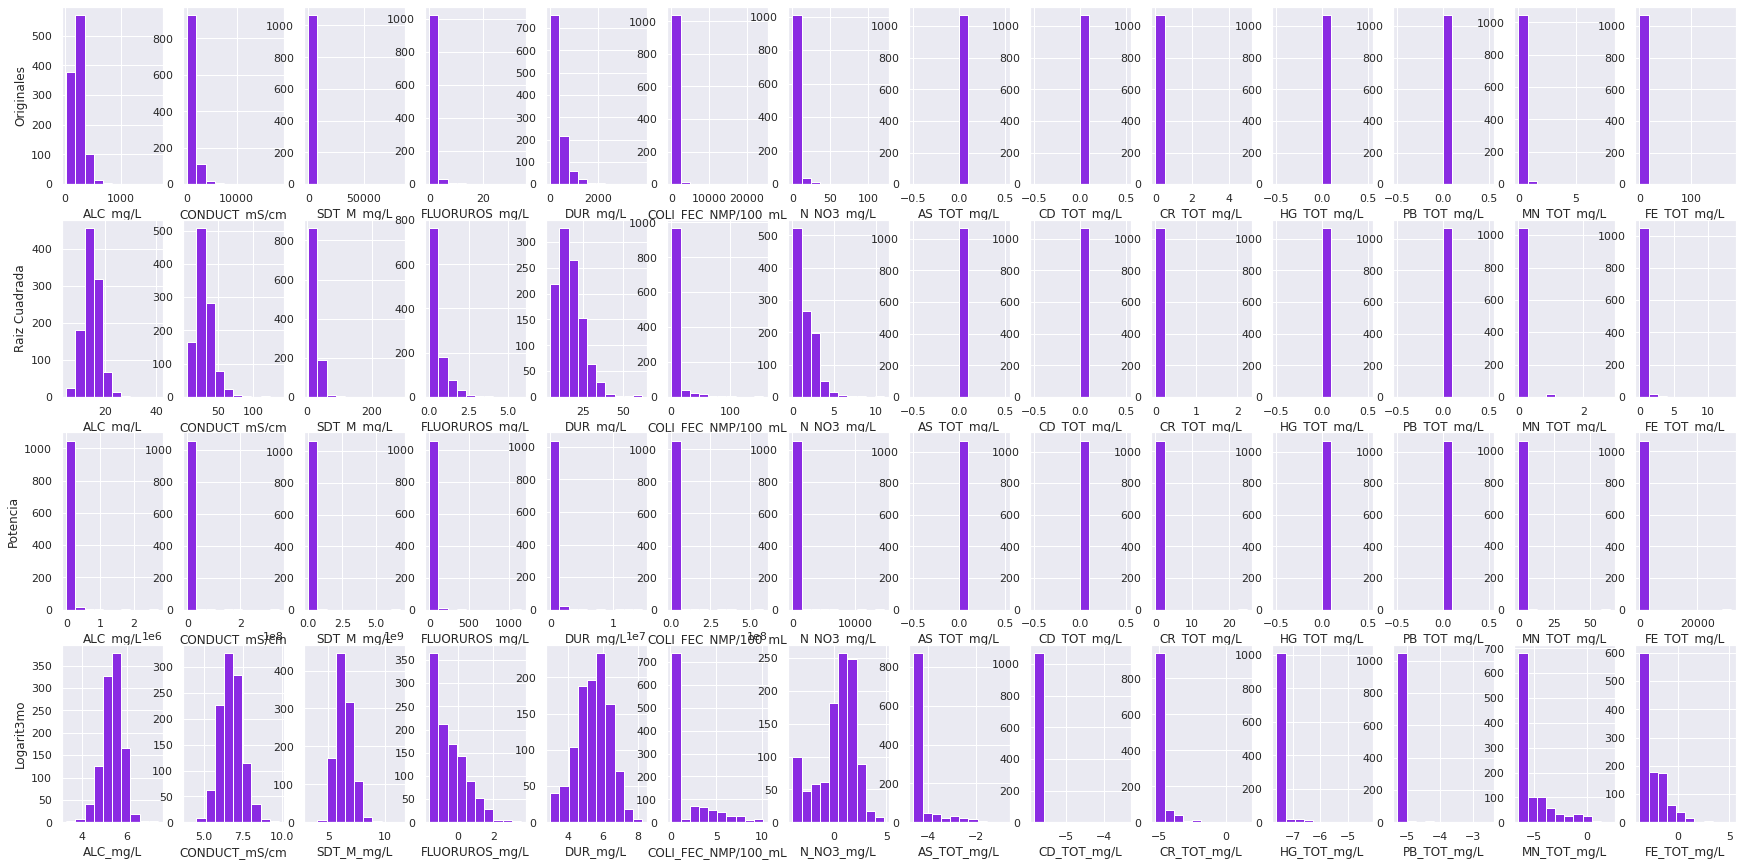

In [ ]:
#Plot de los datos con transformaciones propuestas
sns.set(rc={'figure.figsize':(30,15)})
for k in range(len(columns_plot)-1):
    Color="blueviolet"
    plt.subplot(4,14,k+1)
    plt.hist(df_str[columns_plot[k]], bins=10, color = Color)
    plt.xlabel(columns_plot[k])
    if k==0:
        plt.ylabel("Originales")


    transf1 = df_str[columns_plot[k]]**(1/2)
    plt.subplot(4,14,k+15)
    plt.hist(transf1, bins=10, color = Color)
    plt.xlabel(columns_plot[k])
    if k==0:
        plt.ylabel("Raiz Cuadrada")



    transf2 = df_str[columns_plot[k]]**(2)
    plt.subplot(4,14,k+29)
    plt.hist(transf2, bins=10, color = Color)
    plt.xlabel(columns_plot[k])
    if k==0:
        plt.ylabel("Potencia")



    transf3 = np.log(df_num[columns_plot[k]])
    plt.subplot(4,14,k+43)
    plt.hist(transf3, bins=10, color = Color)
    plt.xlabel(columns_plot[k])
    if k==0:
        plt.ylabel("Logarit3mo")



Comentario: 
Se observa que la mejor transformación es la logarítimica

In [ ]:
df_analysis = np.log(df_num)

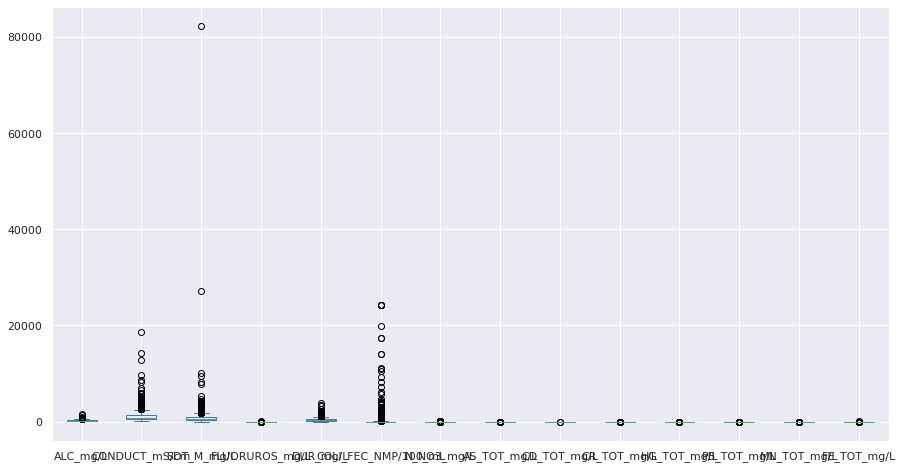

In [ ]:
#Plot de las variables antes y después de transformarse para observar outliers
sns.set(rc={'figure.figsize':(15,8)})
df_num.plot.box()

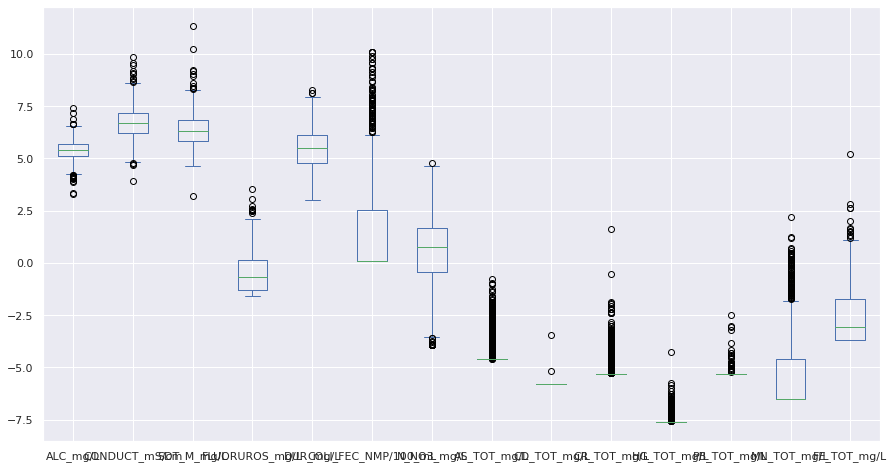

In [ ]:
#Datos con transformacion logaritmica
sns.set(rc={'figure.figsize':(15,8)})
df_analysis.plot.box()

#Análisis geográfico

In [ ]:
#Establecimiento de DataFrame que contiene las variables de Longitud y Latitud
df_ubicacion=df_Aguas_Subterraneas[['LONGITUD','LATITUD']]
df_ubicacion["COORDENADAS"] = list(zip(df.LONGITUD, df.LATITUD))
df_ubicacion["COORDENADAS"] = df_ubicacion["COORDENADAS"].apply(Point)
df_ubicacion.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


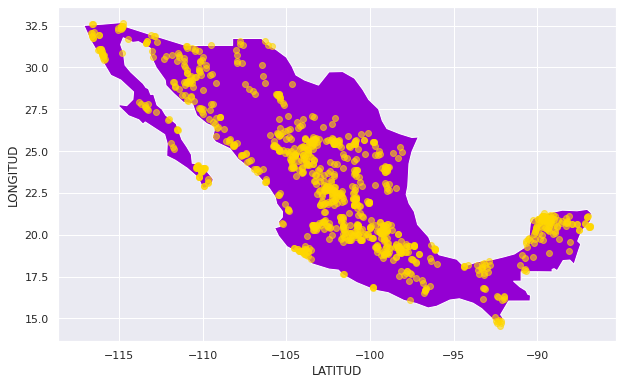

In [ ]:
#Se verifican donde se encuentran todas las aguas subterraneas dentro de Mexico
points = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")
mapa = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, gax = plt.subplots(figsize=(10,10))
mapa.query("name == 'Mexico'").plot(ax=gax, edgecolor='white',color='darkviolet')
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')
Vpoints.plot(ax=gax, color='gold', alpha = 0.6)

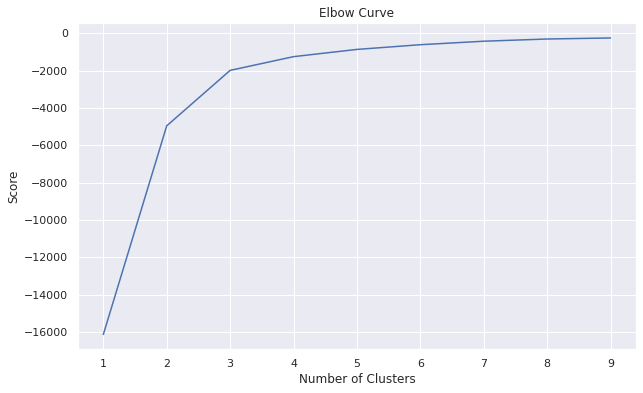

In [ ]:
#Verificación del numero óptimo de K-means a traves de la curva Elbow 

from sklearn.cluster import KMeans
numero_de_closters = range(1,10) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]
Y_axis = df_ubicacion[['LATITUD']]
X_axis = df_ubicacion[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]
plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

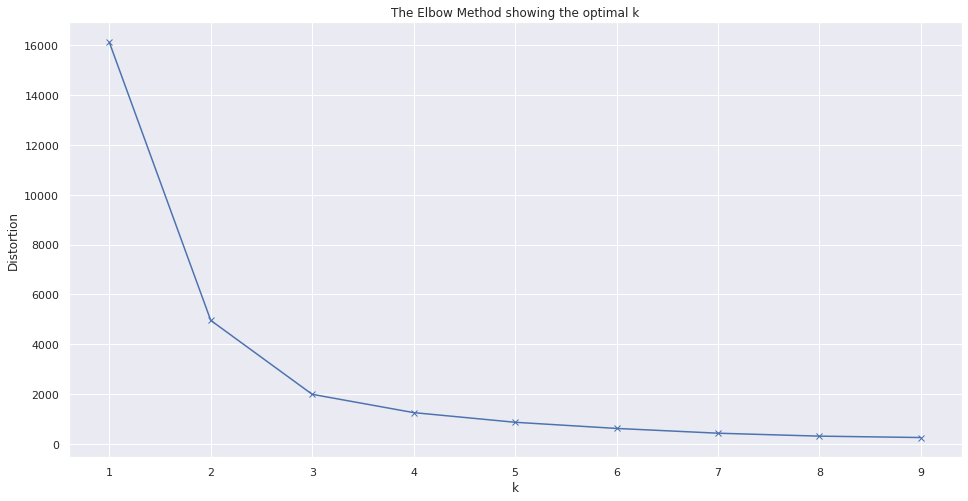

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Y_axis)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#determinación de centroides
X = df_ubicacion[['LONGITUD', 'LATITUD']]
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X) 
C = kmeans.cluster_centers_
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) 
puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,Coordinates
0,-90.728470,19.473362,POINT (-90.72847 19.47336)
1,-101.722127,22.254226,POINT (-101.72213 22.25423)
2,-110.794488,28.438202,POINT (-110.79449 28.43820)


In [ ]:
#Diccionario para cambiar de color los puntos de acuerdo al semáforo 
stacklight_color = {"Rojo":"red","Amarillo":"yellow","Verde":"green"}
colores= y.copy()
for luz_semaforo in range (len(y)):
  colores[luz_semaforo] = y[luz_semaforo].replace(y[luz_semaforo],stacklight_color[y[luz_semaforo]])

In [ ]:
def plotCalidad (colores,name):
  fig, gax = plt.subplots(figsize=(15,10))
  mapa.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='black') #filtramos por pais

  for p in range (len(points)):
    plt.plot(df_ubicacion.LONGITUD[p],
          df_ubicacion.LATITUD[p], 
          marker = "o",
          markersize = 10, 
          color = colores[p], 
          alpha=0.8)

  puntos_centroides.plot(ax=gax, color='dodgerblue', alpha = 1, markersize = 1000, marker ="*") 

  gax.set_xlabel('Longitud')
  gax.set_ylabel('Latitud')
  gax.set_title('Aguas Profundas - '+ name)

  plt.show()

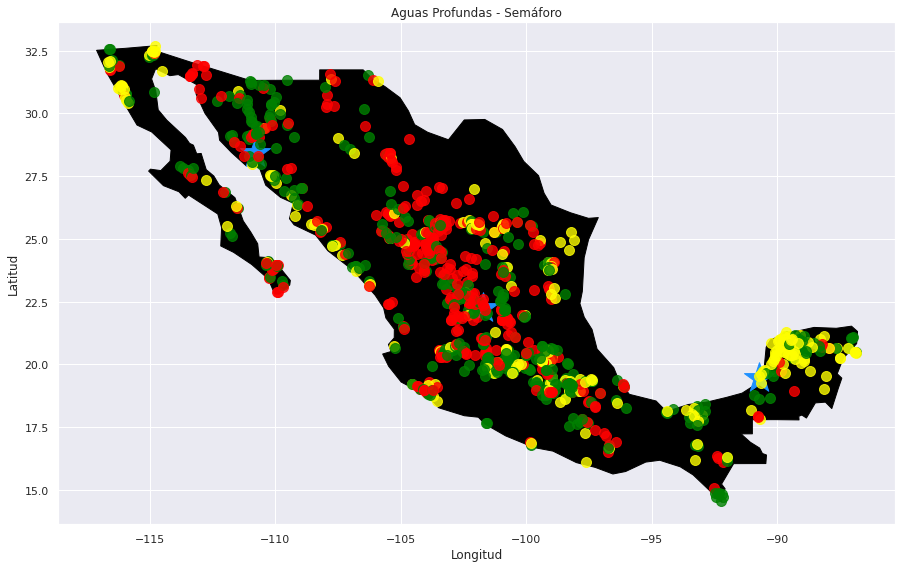

In [ ]:
#Plot de todos los puntos de acuerdo al semáforo 
plotCalidad(colores,"Semáforo")

In [ ]:
df_subtipo = df["SUBTIPO"].copy()
df_subtipo.replace("NORIA","POZO NORIA", inplace = True)
df_subtipo.replace("Pozo","POZO", inplace = True)
df_subtipo.value_counts()

POZO             1040
MANANTIAL          12
POZO NORIA          7
CENOTE              7
DESCARGA            1
BOMBEO CENOTE       1
Name: SUBTIPO, dtype: int64

In [ ]:
stacklight_color = {"POZO":"lightcoral",
                    "MANANTIAL":"khaki",
                    "CENOTE":"royalblue",
                    "POZO NORIA":"turquoise", 
                    "BOMBEO CENOTE": "olive",
                    "DESCARGA":"palegreen",}
colores2= df_subtipo.copy()
for l in range (len(colores2)):
  colores2[l] = colores2[l].replace(colores2[l],stacklight_color[colores2[l]])


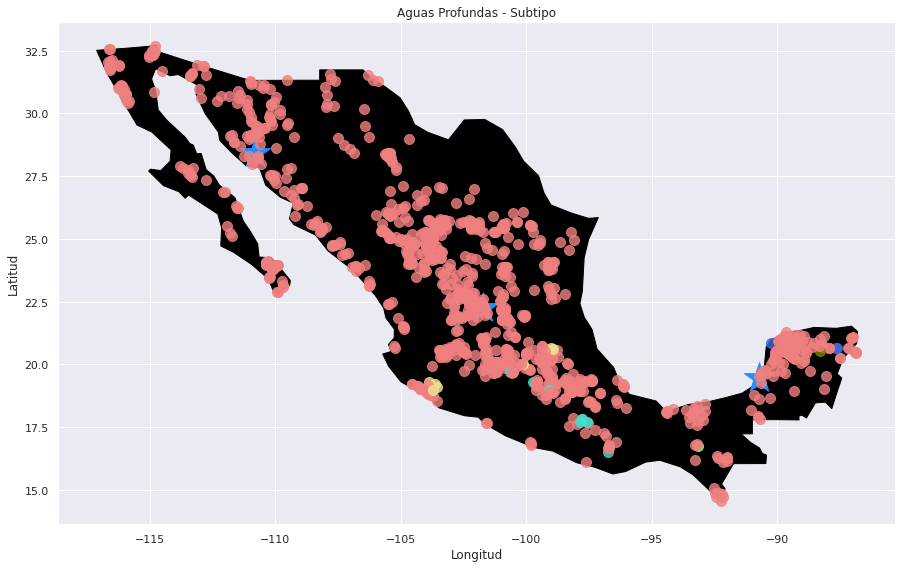

In [ ]:
plotCalidad(colores2,"Subtipo")

In [ ]:
df_calidadColi = df["CALIDAD_COLI_FEC"].copy()
df_calidadColi.value_counts()

Potable - Excelente        739
Buena calidad              208
Aceptable                   60
Contaminada                 49
Fuertemente contaminada     12
Name: CALIDAD_COLI_FEC, dtype: int64

In [ ]:
stacklight_color = {"Potable - Excelente":"forestgreen",
                    "Buena calidad":"limegreen",
                    "Aceptable":"gold",
                    "Contaminada":"tomato", 
                    "Fuertemente contaminada": "red",
                    }
colores3= df_calidadColi.copy()
for l in range (len(colores3)):
  colores3[l] = colores3[l].replace(colores3[l],stacklight_color[colores3[l]])

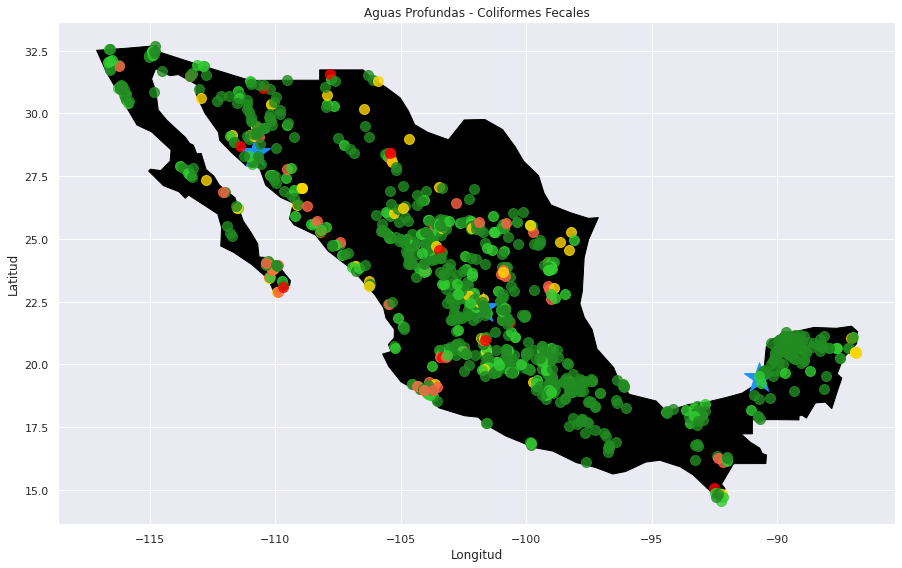

In [ ]:
plotCalidad(colores3,"Coliformes Fecales")

In [ ]:
df_calidadAlc = df["CALIDAD_ALC"].copy()
df_calidadAlc.value_counts()

Alta                    794
Media                   187
Indeseable como FAAP     59
Baja                     24
Name: CALIDAD_ALC, dtype: int64

In [ ]:
df_calidadAlc.fillna("Alta", inplace = True)

In [ ]:
stacklight_color = {"Alta":"forestgreen",
                    "Media":"gold",
                    "Indeseable como FAAP":"tomato", 
                    "Baja": "red",
                    }
colores4= df_calidadAlc.copy()
for l in range (len(colores4)):
  colores4[l]=colores4[l].replace(colores4[l],stacklight_color[colores4[l]])


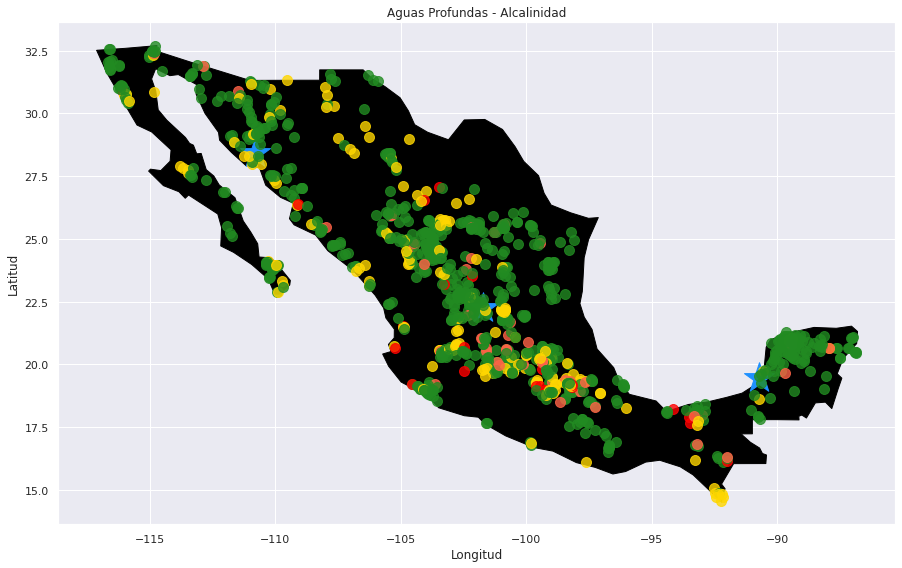

In [ ]:
plotCalidad(colores4,"Alcalinidad")

In [ ]:
df_calidadSDT = df["CALIDAD_SDT_ra"].copy()
df_calidadSDT.value_counts()

Excelente para riego            491
Cultivos sensibles              343
Cultivos con manejo especial    161
Cultivos tolerantes              64
Indeseable para riego             7
Name: CALIDAD_SDT_ra, dtype: int64

In [ ]:
df_calidadSDT.isnull().sum()

2

In [ ]:
df_calidadSDT.fillna("Excelente para riego", inplace = True)

In [ ]:
stacklight_color = {"Excelente para riego":"forestgreen",
                    "Cultivos sensibles":"gold",
                    "Cultivos con manejo especial":"brown", 
                    "Cultivos tolerantes": "tomato",
                    "Indeseable para riego": "red"
                    }
colores5= df_calidadSDT.copy()
for l in range (len(colores5)):
  colores5[l]=colores5[l].replace(colores5[l],stacklight_color[colores5[l]])

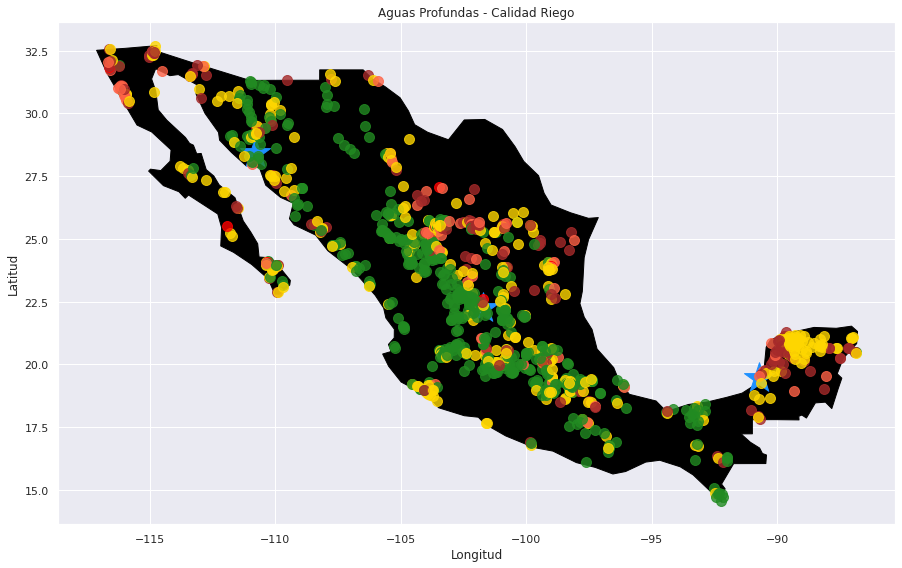

In [ ]:
plotCalidad(colores5,"Calidad Riego")

#Agrupamiento

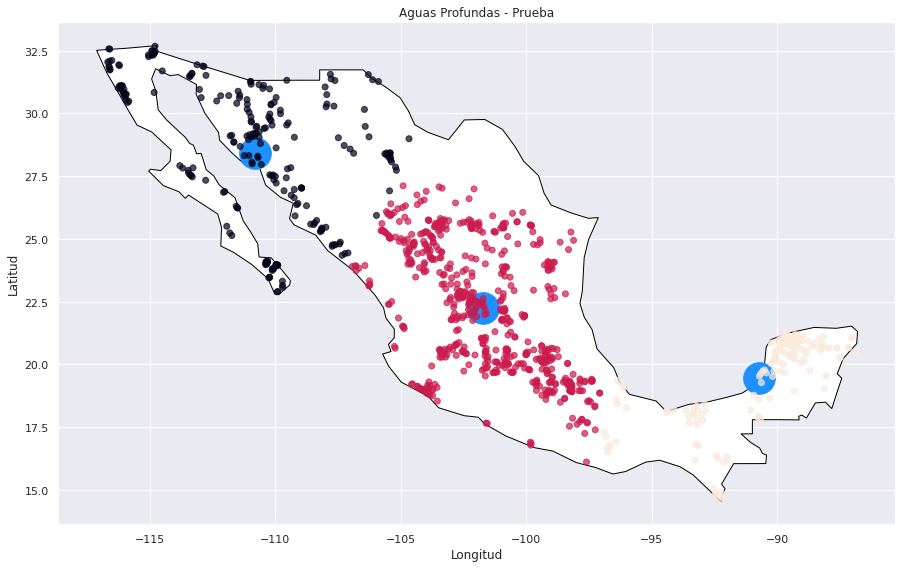

In [ ]:
  
X = df_ubicacion[['LONGITUD', 'LATITUD']]
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X) 
C = kmeans.cluster_centers_
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) 
puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides
  
fig, gax = plt.subplots(figsize=(15,10))
mapa.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

puntos_centroides.plot(ax=gax, color='dodgerblue', alpha = 1, markersize = 1000, marker ="o") 
points.plot(ax=gax, alpha = 0.7, c=kmeans.labels_) 
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Aguas Profundas - '+ "Prueba")
plt.show()

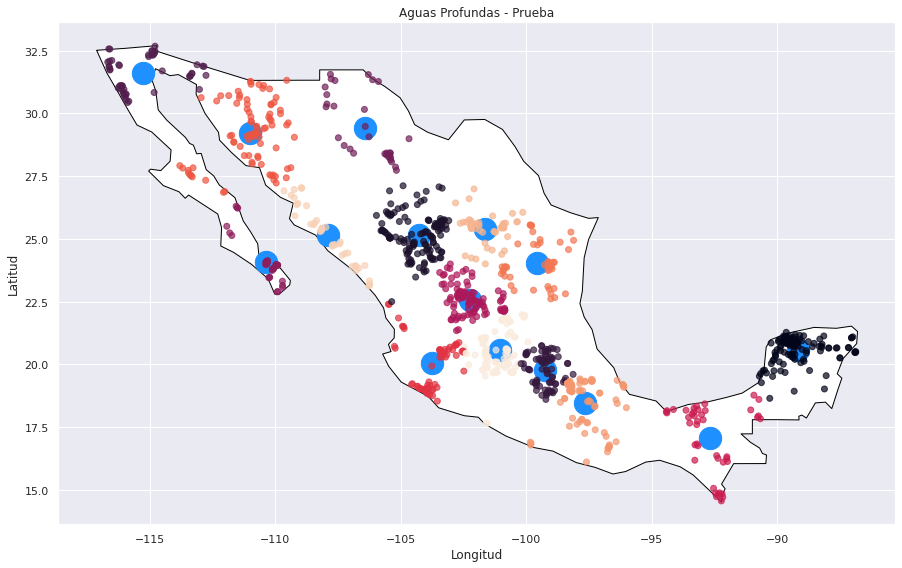

In [ ]:

X = df_ubicacion[['LONGITUD', 'LATITUD']]
kmeans = KMeans(n_clusters=15).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X) 
C = kmeans.cluster_centers_
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) 
puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides
  
fig, gax = plt.subplots(figsize=(15,10))
mapa.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') 
puntos_centroides.plot(ax=gax, color='dodgerblue', alpha = 1, markersize = 500, marker ="o") 
points.plot(ax=gax, alpha = 0.7, c=kmeans.labels_) 
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Aguas Profundas - '+ "Prueba")
plt.show()

Comentario: 
En este punto solamente observamos una pequeña relación entre la variable calidad de Riego y el Semáforo. No podemos determinar relación entre la zona geográfica y la calidad del agua. Al incrementar el número de centroides se observa una distribución más similar al semáforo.


#Conclusiones

* La limpieza de datos es una parte fundamental para un correcto análisis. 
* K-means nos permite identificar de manera rápida la agrupación de los datos a partir de centroides. 
* En la práctica pudimos observar una pequeña semejanza con una de las variables respecto al semáforo, en este punto no podemos predicir con certeza el semáforo basándonos en las variables de entrada. 
